## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

In [5]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(X)

StandardScaler()

In [8]:
X_std = scaler.transform(X)

In [9]:
Y = data.target.values

In [10]:
D_Train, d_test, Y_Train, y_test = train_test_split(X_std, Y, test_size = 0.2, random_state = 42, stratify = Y)

In [11]:
d_train, d_cv, y_train, y_cv = train_test_split(D_Train, Y_Train, test_size = 0.2, random_state = 52, stratify = Y_Train)

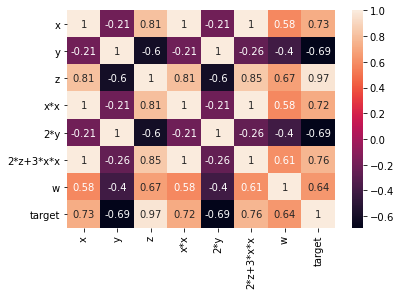

In [12]:
import seaborn as sns

data_corr = data.corr()
# plot the heatmap and annotation on it
sns.heatmap(data_corr, xticklabels=data_corr.columns, yticklabels=data_corr.columns, annot=True)

# Task 1

In [13]:
clf = SGDClassifier(loss = 'log', random_state = 42)
param = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(clf, param, cv=3)
grid_search.fit(X,Y)
grid_search.best_params_

{'alpha': 0.001}

In [14]:
best_model = SGDClassifier(loss = 'log', alpha = 0.001)
best_model.fit(X,Y)
best_model

SGDClassifier(alpha=0.001, loss='log')

In [15]:
from sklearn.metrics import accuracy_score
y_pred = best_model.predict(X)
acc = accuracy_score(Y, y_pred)
acc

1.0

In [16]:
w = best_model.coef_
w

array([[ 1.58281712, -1.40762491,  3.16293381,  1.463818  , -1.40762491,
         1.69931761,  0.96989299]])

In [17]:
X_noise = [i + 0.01 for i in X]

In [18]:
best_model_ed = SGDClassifier(loss = 'log', alpha = 0.001)
best_model_ed.fit(X_noise,Y)
best_model_ed

SGDClassifier(alpha=0.001, loss='log')

In [19]:
y_pred = best_model_ed.predict(X_noise)
acc_ed = accuracy_score(Y, y_pred)
acc_ed

1.0

In [20]:
w_ed = best_model_ed.coef_
w_ed

array([[ 1.23383694, -1.82307732,  3.32532871,  1.05060872, -1.82307732,
         1.34690071,  1.23016004]])

In [21]:
acc_diff = acc - acc_ed
acc_diff

0.0

In [22]:
w_change = abs(w - w_ed)
w_change = w_change[0]
percentage_change = []
for i in range(len(w_change)):
    percentage_change.append((w_change[i] / w[0][i]) * 100)
    
change_lr = np.argsort(np.array(percentage_change))[::-1]
for i in change_lr[0:4]:
    print(w[0][i])

1.4638180032131305
0.9698929918028449
1.5828171217983074
1.6993176139602337


In [23]:
features = data.columns.drop("target").values
for i in change_lr[0:4]:
    print(features[i])

x*x
w
x
2*z+3*x*x


# Observations:
## In Logistic Regression we performed perturbation test to check the presence of collinearity. Looking at the percentage value difference between the original and perturbated data, the estimates remain low indicating collinearity is stabe and will not vary a lot

## TASK 2

In [24]:
clf = SGDClassifier(random_state = 42)
param = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(clf, param, cv=3)
grid_search.fit(X,Y)
grid_search.best_params_

{'alpha': 0.01}

In [25]:
best_model_svm = SGDClassifier(alpha = 0.01)
best_model_svm.fit(X,Y)
best_model_svm

SGDClassifier(alpha=0.01)

In [26]:
from sklearn.metrics import accuracy_score
y_pred_svm = best_model_svm.predict(X)
acc_svm = accuracy_score(Y, y_pred)
acc_svm

1.0

In [27]:
w_svm = best_model.coef_
w_svm

array([[ 1.58281712, -1.40762491,  3.16293381,  1.463818  , -1.40762491,
         1.69931761,  0.96989299]])

In [28]:
X_noise_svm = [i + 0.01 for i in X]

In [29]:
best_model_svm_ed = SGDClassifier(alpha = 0.01)
best_model_svm_ed.fit(X_noise_svm,Y)
best_model_svm_ed

SGDClassifier(alpha=0.01)

In [30]:
y_pred_svm_ed = best_model_svm_ed.predict(X_noise)
acc_svm_ed = accuracy_score(Y, y_pred_svm_ed)
acc_svm_ed

1.0

In [31]:
w_svm_ed = best_model_svm_ed.coef_
w_svm_ed

array([[ 0.53363278, -0.40345256,  1.37882253,  0.44486122, -0.40345256,
         0.56680288,  0.2602452 ]])

In [32]:
acc_diff_svm = acc_svm - acc_svm_ed
acc_diff_svm

0.0

In [33]:
w_change_svm = abs(w_svm - w_svm_ed)
w_change_svm

array([[1.04918435, 1.00417236, 1.78411128, 1.01895678, 1.00417236,
        1.13251474, 0.7096478 ]])

In [34]:
w_change_svm = w_change_svm[0]
percentage_change_svm = []
for i in range(len(w_change_svm)):
    percentage_change_svm.append((w_change_svm[i] / w_svm[0][i]) * 100)
    
change_svm = np.argsort(np.array(percentage_change_svm))[::-1]
for i in change_svm[0:4]:
    print(w_svm[0][i])

0.9698929918028449
1.4638180032131305
1.6993176139602337
1.5828171217983074


In [35]:
features = data.columns.drop("target").values
for i in change_svm[0:4]:
    print(features[i])

w
x*x
2*z+3*x*x
x


# Observation:
## In Linear SVM we performed perturbation test to check the presence of collinearity. Looking at the percentage value difference between the original and perturbated data, the estimates were higher then those in Logistic regression indicating collinearity is less stable and may vary strongly. Logistic Regression performs better then Linear SVM on perturbation test to check the presence of collinearity